# Develop Linear and Non-Linear (polynomial with degree n) regression models for predicting cases and deaths in US

In [1]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import Image

### Start from 2020.06.01 (Monday) to 2021.01.03 (Sunday) of infections in US. X-Axis - number of days, Y-Axis - number of new cases and deaths

In [2]:
cases = pd.read_csv('../covid_confirmed_usafacts.csv')
cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [3]:
selected_date_columns = [col for col in cases.columns if '2020-06-01' <= col <= '2021-01-03']
cases = cases[selected_date_columns]
cases.head()

,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,...,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,233,238,239,241,248,259,265,272,282,295,...,3990,3999,4029,4065,4105,4164,4190,4239,4268,4305
2,292,292,292,293,296,304,313,320,325,331,...,12666,12708,12825,12962,13172,13392,13601,13823,13955,14064
3,172,175,177,177,183,190,193,197,199,208,...,1396,1398,1406,1417,1462,1492,1514,1517,1528,1530
4,76,76,76,76,76,77,77,79,85,89,...,1725,1739,1746,1762,1792,1817,1834,1854,1863,1882


In [4]:
deaths = pd.read_csv('../covid_deaths_usafacts.csv')
deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


In [5]:
selected_date_columns = [col for col in deaths.columns if '2020-06-01' <= col <= '2021-01-03']
deaths = deaths[selected_date_columns]
deaths.head()

,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,...,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,5,5,5,5,5,5,5,5,6,...,46,46,47,47,47,48,48,50,50,50
2,9,9,9,9,9,9,9,9,9,9,...,151,151,152,152,156,160,161,169,169,169
3,1,1,1,1,1,1,1,1,1,1,...,32,32,32,32,32,32,32,33,33,33
4,1,1,1,1,1,1,1,1,1,1,...,42,42,42,42,42,46,46,46,46,46


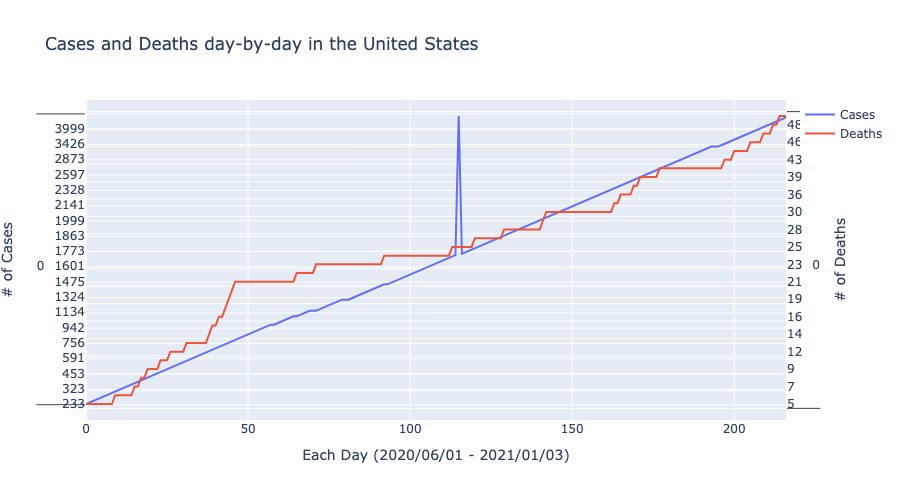

In [7]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(len(cases))), y=cases,
                         mode='lines', name='Cases'))

fig.add_trace(go.Scatter(x=list(range(len(deaths))), y=deaths,
                         mode='lines', name='Deaths', yaxis='y2'))

fig.update_layout(
    title='Cases and Deaths day-by-day in the United States',
    xaxis=dict(title='Each Day (2020/06/01 - 2021/01/03)'),
    yaxis=dict(title='# of Cases'),
    yaxis2=dict(title='# of Deaths', overlaying='y', side='right'),
    showlegend=True,
    width=900,
    height=500
)

fig.write_image("cases_deaths.png")
Image(filename="cases_deaths.png")